**Name: Kalhar Patel**

Mail: kalharpatel9@gmail.com

**Task 3: Customer Segmentation/ Clustering:**

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

This code performs customer segmentation using Spectral Clustering, leveraging customer transaction data to identify distinct groups. It begins by aggregating transactional features like total spend, average transaction value, and quantity, followed by scaling these features for consistency. Spectral Clustering is applied with a predefined number of clusters (`optimal_k = 10`), assigning each customer to a cluster. The quality of the clustering is evaluated using the Davies-Bouldin Index, while cluster metrics such as average spend and transaction count provide insights into each group. Finally, a scatter plot visualizes the clusters for interpretation.

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def perform_customer_segmentation():
    # Read the CSV files
    customers_df = pd.read_csv('/content/Customers.csv', encoding='utf8')
    transactions_df = pd.read_csv('/content/Transactions.csv', encoding='utf8')

    # Feature Engineering
    customer_features = transactions_df.groupby('CustomerID').agg({
        'TransactionID': 'count',
        'TotalValue': ['sum', 'mean'],
        'Quantity': ['sum', 'mean']
    }).reset_index()

    # Flatten column names
    customer_features.columns = ['CustomerID', 'transaction_count', 'total_spend',
                                  'avg_transaction_value', 'total_quantity', 'avg_quantity']

    # Scale features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

    # Spectral Clustering
    optimal_k = 10
    # Assuming optimal number of clusters is determined elsewhere
    spectral = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(features_scaled)

    # Assign cluster labels to the customer features
    customer_features['Cluster'] = spectral_labels

    # Calculate cluster metrics
    cluster_metrics = customer_features.groupby('Cluster').agg({
        'CustomerID': 'count',
        'transaction_count': 'mean',
        'total_spend': 'mean',
        'avg_transaction_value': 'mean'
    }).round(2)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(features_scaled, spectral_labels)

    # Print results
    print("\nClustering Results:")
    print(f"Spectral Clustering with {optimal_k} clusters")
    print(f"Davies-Bouldin Index: {db_index:.4f}")
    print("\nCluster Metrics:")
    print(cluster_metrics)

    # Visualization of clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(features_scaled[:, 0], features_scaled[:, 1],
                c=customer_features['Cluster'], cmap='viridis', alpha=0.7)
    plt.title('Customer Segments Visualization (Spectral Clustering)')
    plt.xlabel('Normalized Transaction Count')
    plt.ylabel('Normalized Total Spend')
    plt.colorbar(label='Cluster')
    plt.show()


***Plotting the segmentation graph:***


Clustering Results:
Spectral Clustering with 10 clusters
Davies-Bouldin Index: 1.0438

Cluster Metrics:
         CustomerID  transaction_count  total_spend  avg_transaction_value
Cluster                                                                   
0                14               5.29      5132.04                 978.97
1                17               4.88      2688.89                 553.30
2                27               4.89      3411.58                 701.10
3                30               2.63      1892.26                 726.45
4                28               7.07      4989.44                 715.08
5                15               3.27      3614.79                1109.35
6                15               2.00       643.13                 335.56
7                20               8.45      6852.12                 823.67
8                17               7.06      3134.06                 451.32
9                16               4.12      1853.81                 44

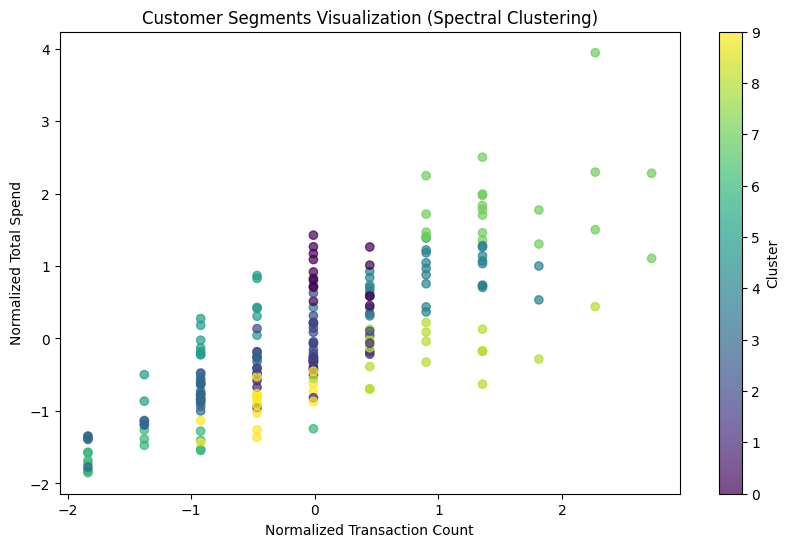

In [36]:
# Execute the clustering
perform_customer_segmentation()